# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf

# Lista de símbolos dos ativos que você deseja baixar
ativos = ["CRM", "DOMO", "DDOG"]

# Baixando os dados dos ativos
dados = yf.download(ativos, start="2021-08-11", end="2023-08-11")

# Exibindo os primeiros registros dos dados baixados
print(dados.head())

# Salvando os dados em um arquivo CSV
dados.to_csv("dados_ativos.csv")


[*********************100%***********************]  3 of 3 completed
             Adj Close                              Close              \
                   CRM        DDOG       DOMO         CRM        DDOG   
Date                                                                    
2021-08-11  242.279999  128.210007  89.449997  242.279999  128.210007   
2021-08-12  248.389999  130.279999  91.430000  248.389999  130.279999   
2021-08-13  251.559998  135.490005  89.650002  251.559998  135.490005   
2021-08-16  249.199997  133.520004  88.190002  249.199997  133.520004   
2021-08-17  246.990005  133.000000  86.050003  246.990005  133.000000   

                             High                                Low  \
                 DOMO         CRM        DDOG       DOMO         CRM   
Date                                                                   
2021-08-11  89.449997  246.149994  128.740005  92.480003  240.100006   
2021-08-12  91.430000  248.429993  131.130005  91.610001  

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

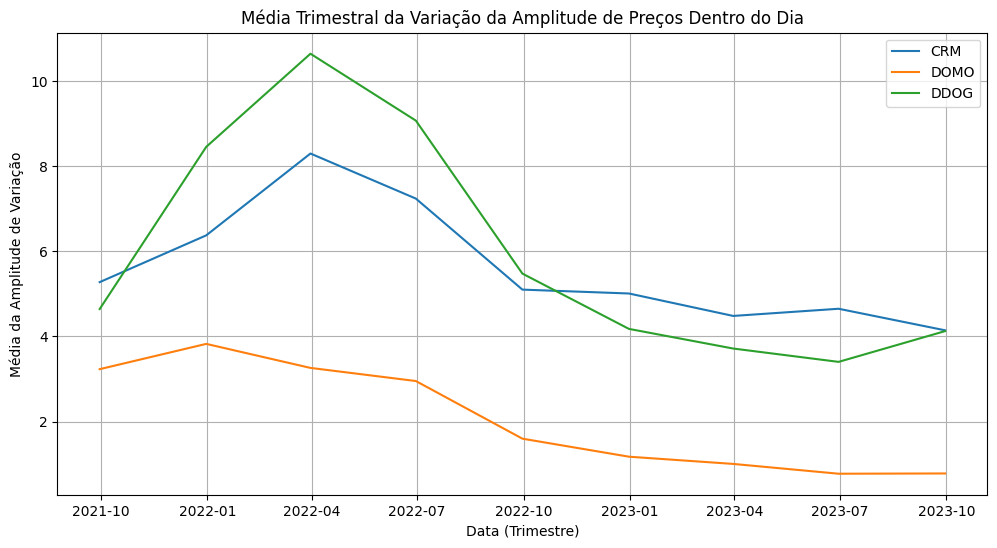

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo os dados baixados do arquivo CSV
dados = pd.read_csv("dados_ativos.csv", header=[0, 1], index_col=0)

# Convertendo o índice para um índice de data
dados.index = pd.to_datetime(dados.index)

# Calculando a amplitude de variação do valor do ativo dentro do dia
amplitude_variacao = dados["High"] - dados["Low"]

# Resample dos dados para trimestral e cálculo da média da amplitude de variação
amplitude_variacao_trimestral = amplitude_variacao.resample("Q").mean()

# Montando um gráfico de linha para a variação da média trimestral da amplitude ao longo do período
plt.figure(figsize=(12, 6))
for ativo in ativos:
    plt.plot(amplitude_variacao_trimestral.index, amplitude_variacao_trimestral[ativo], label=ativo)

plt.title("Média Trimestral da Variação da Amplitude de Preços Dentro do Dia")
plt.xlabel("Data (Trimestre)")
plt.ylabel("Média da Amplitude de Variação")
plt.legend()
plt.grid(True)
plt.show()


* Todos estes ativos estão relacionados a empresas que oferecem ferramentas que facilitam a análise, o monitoramento e a gestão eficaz de dados e operações, por isso foram escolhidas para esta tarefa, respondendo à questão sobre qual ativo apresentou maior volatidade, podemos identificar claramente que o ativo DDOG (Linha Verde) foi o ativo que apresentou a maior volatidade devido à apresentar uma média trimestral de amplitude de variação começando em 5 e se estendo até 10 em 2022 e depois regressando abruptamente para valores muito menores.